<a href="https://colab.research.google.com/github/nazalnihad/image_processing/blob/main/noise_and_filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

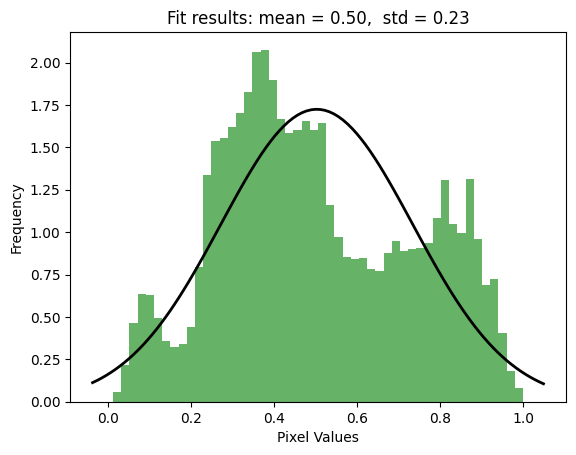

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import ndimage

image = plt.imread('/content/lena.png')

# Flatten the image to a 1D array
flat_image = image.flatten()

# Estimate the mean and standard deviation of the pixel values
mean, std_dev = norm.fit(flat_image)

# histogram of the pixel values
plt.hist(flat_image, bins=50, density=True, alpha=0.6, color='g')

# Gaussian distribution based on the estimated mean and standard deviation
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std_dev)
plt.plot(x, p, 'k', linewidth=2)


plt.title("Fit results: mean = %.2f,  std = %.2f" % (mean, std_dev))
plt.xlabel('Pixel Values')
plt.ylabel('Frequency')

plt.show()


In [32]:
noise = np.random.normal(0.1, 0.1, flat_image.shape)
noise = noise.reshape(image.shape)
noisy_image = image + noise
noisy = np.clip(noisy_image, 0, 1)

plt.imsave('noisy_image.png', noisy, cmap='gray')

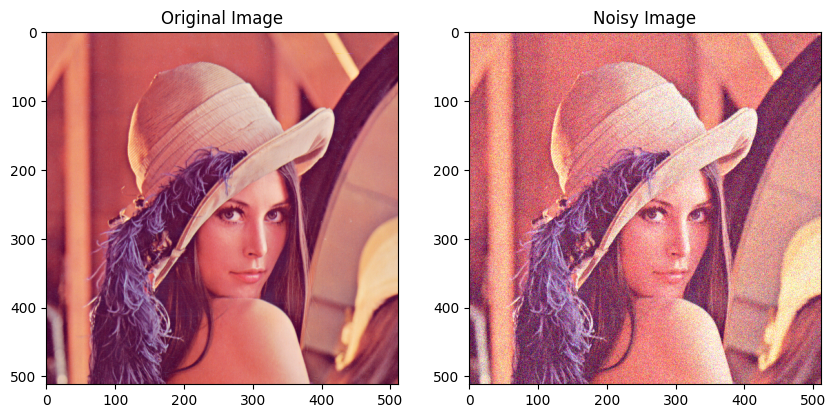

In [23]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(noisy_image, cmap='gray')
plt.title('Noisy Image')

plt.show()

In [17]:
def calculate_psnr(original, noisy):
    mse = np.mean((original - noisy) ** 2)
    max_pixel = np.max(original)
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr

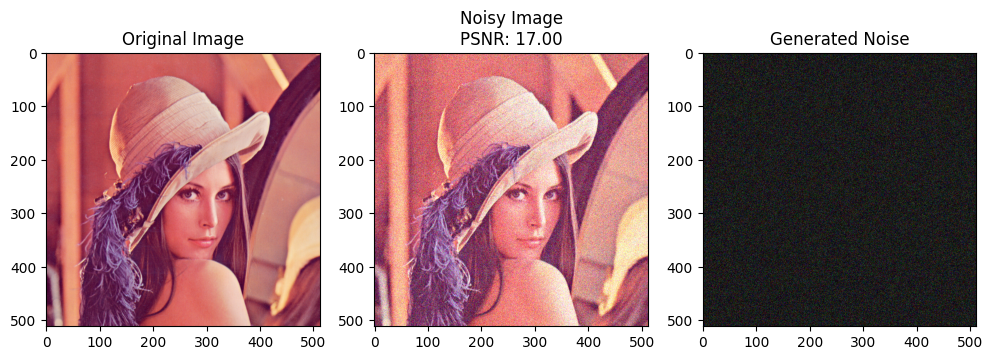


PSNR : 17.00


In [25]:
psnr_value = calculate_psnr(image, noisy_image)
plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(noisy_image, cmap='gray')
plt.title(f'Noisy Image\nPSNR: {psnr_value:.2f}')

plt.subplot(1, 3, 3)
plt.imshow(noise, cmap='gray')
plt.title('Generated Noise')

plt.show()

print(f"\nPSNR : {psnr_value:.2f}")

In [26]:
def create_mask(dimension):
  filter = np.ones((dimension, dimension))

    # Calculate the reciprocal of the total number of elements in the filter
  reciprocal_factor = 1 / (dimension * dimension)

    # Multiply the filter by the reciprocal factor
  filter *= reciprocal_factor

  return filter

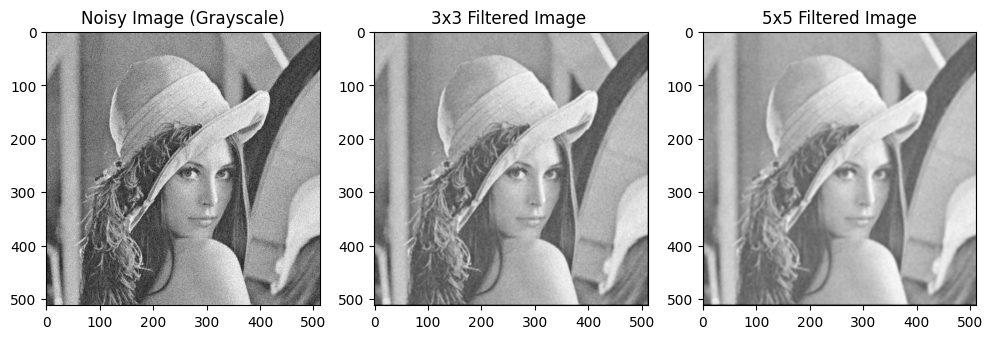

In [40]:
noisy_image = plt.imread('/content/noisy_image.png')

# Convert the color image to grayscale
noisy_image_gray = np.mean(noisy_image, axis=-1)

filter_3 = create_mask(3)
filter_5 = create_mask(5)

# Function to apply convolution with padding
def apply_convolution(image, filter):
    height, width = image.shape
    f_height, f_width = filter.shape

    #  padding size
    pad_height = f_height // 2
    pad_width = f_width // 2

    # Pad the image
    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant', constant_values=0)

    result = np.zeros_like(image)

    for i in range(pad_height, height + pad_height):
        for j in range(pad_width, width + pad_width):
            region = padded_image[i - pad_height:i + pad_height + 1, j - pad_width:j + pad_width + 1]
            result[i - pad_height, j - pad_width] = np.sum(region * filter)

    return result

filtered_image_3 = apply_convolution(noisy_image_gray, filter_3)
filtered_image_5 = apply_convolution(noisy_image_gray, filter_5)

plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
plt.imshow(noisy_image_gray, cmap='gray')
plt.title('Noisy Image (Grayscale)')

plt.subplot(1, 3, 2)
plt.imshow(filtered_image_3, cmap='gray')
plt.title('3x3 Filtered Image ')

plt.subplot(1, 3, 3)
plt.imshow(filtered_image_5, cmap='gray')
plt.title('5x5 Filtered Image')

plt.show()


In [45]:
x3_filter = calculate_psnr(noisy_image_gray,filtered_image_3)
x5_filter = calculate_psnr(noisy_image_gray,filtered_image_5)
print(f"PSNR of 3x3 is {x3_filter} and 5x5 is {x5_filter}")

PSNR of 3x3 is 26.69788360595703 and 5x5 is 25.359089374542236


In [46]:
calculate_psnr(filtered_image_3,filtered_image_5)

33.79232168197632